# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving vesselProbabilities.nii.gz to vesselProbabilities.nii.gz


## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [3]:
file_path = list(uploaded.keys())[0]
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (364, 436, 364)


## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

(np.float64(-0.5), np.float64(435.5), np.float64(363.5), np.float64(-0.5))

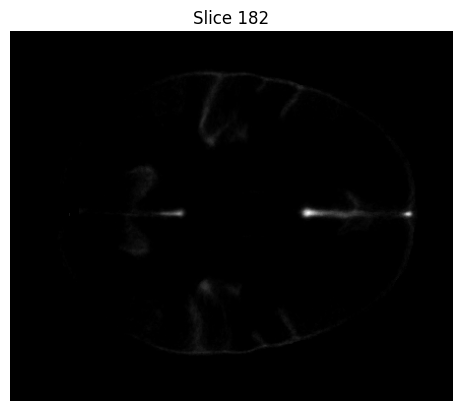

In [5]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [6]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

364

## Normalize a Slice
Normalization improves contrast.

(np.float64(-0.5), np.float64(435.5), np.float64(363.5), np.float64(-0.5))

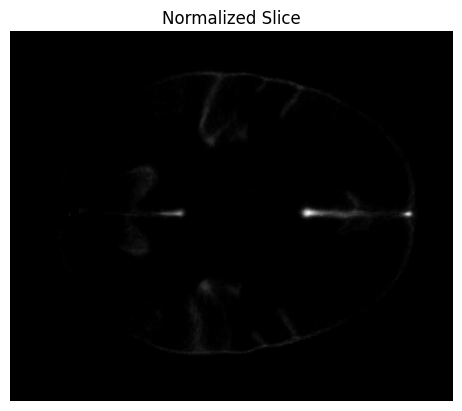

In [8]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

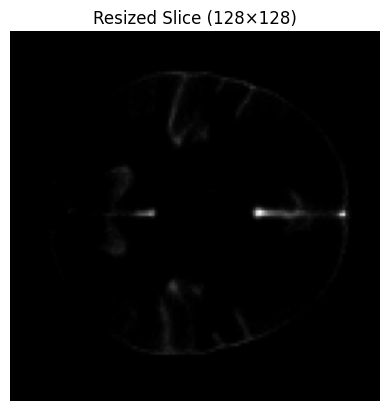

In [9]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.


MRI 2

In [10]:
from google.colab import files
uploaded = files.upload()

Saving vesselRadius.nii.gz to vesselRadius.nii.gz


In [33]:
file_path = list(uploaded.keys())[0]
mri_2 = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (364, 436, 364)


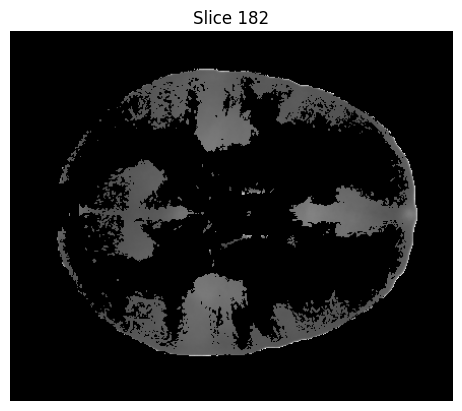

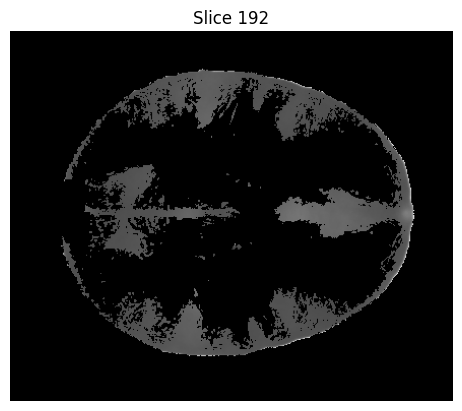

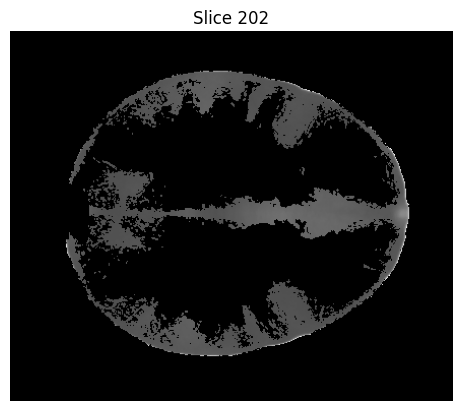

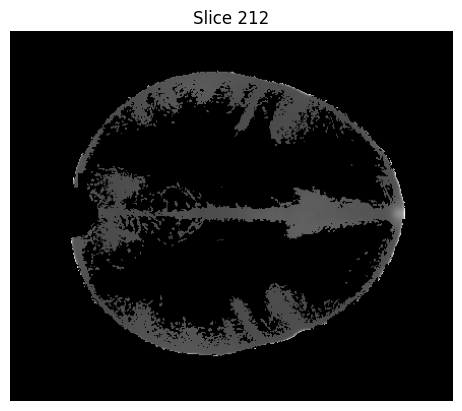

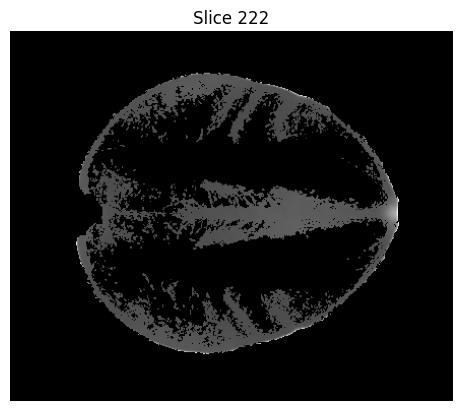

In [31]:
for i in range(5):
  slice_index = (mri.shape[2] // 2)+ 10*i
  plt.imshow(mri[:, :, slice_index], cmap='gray')
  plt.title(f'Slice {slice_index}')
  plt.axis('off')
  plt.show()

In [28]:
def plot_slices(volume, indices):
    num_slices = len(indices)
    plt.figure(figsize=(3 * num_slices, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_slices, i + 1)
        plt.imshow(volume[:, :, idx], cmap='gray')
        plt.title(f'Slice {idx}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [42]:
def normalize_all_slices(volume):
  min_val = np.min(volume)
  max_val = np.max(volume)
  normalized_volume_slices = []

  for i in range(volume.shape[2]):
    current_slice = volume[:, :, i]
    norm_slice = (current_slice - min_val) / (max_val - min_val)
    normalized_volume_slices.append(norm_slice)

  return np.stack(normalized_volume_slices, axis=-1)

In [43]:
normalized_mri_volume = normalize_all_slices(mri)
print('Shape of normalized MRI volume:', normalized_mri_volume.shape)

Shape of normalized MRI volume: (364, 436, 364)
